In [1]:
import torch
import torchvision
from torchvision.datasets import ImageNet
from torchvision import models
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader
import numpy as np
import urllib
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


In [2]:

dataset = ImageNet(root='/Users/adamfulton/Documents/machine learning/MobileNet/data')
print(len(dataset))

100000


In [3]:
dataset = ImageNet(root='/Users/adamfulton/Documents/machine learning/MobileNet/data',transform= transforms.ToTensor())
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


In [4]:

model = models.mobilenet_v3_large(pretrained=True)
model.eval()

MobileNetV3(
  (features): Sequential(
    (0): ConvNormActivation(
      (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (2): Hardswish()
    )
    (1): InvertedResidual(
      (block): Sequential(
        (0): ConvNormActivation(
          (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=16, bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
        )
        (1): ConvNormActivation(
          (0): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
        )
      )
    )
    (2): InvertedResidual(
      (block): Sequential(
        (0): ConvNormActivation(
          (0): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1), bias=False

In [5]:
url, filename = ("https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt", "imagenet_classes.txt")
urllib.request.urlretrieve(url, filename) 
with open("imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]
    

In [6]:
img_tensor,label = dataset[0]


In [7]:
def split_indices(n, percentage):
    per = int(percentage * n)
    idxs = np.random.permutation(n)
    return idxs[per:], idxs[:per]

In [8]:
test_indices,val_indices = split_indices(len(dataset),percentage=0.9)
print(len(test_indices), len(val_indices))

10000 90000


In [9]:
batch_size=100

test_sampler = SubsetRandomSampler(test_indices)
val_sampler = SubsetRandomSampler(val_indices)
test_loader = DataLoader(dataset,batch_size,sampler=test_sampler)
val_loader = DataLoader(dataset,batch_size,sampler=val_sampler)


len(test_loader)

100

In [10]:
model.to(device)

MobileNetV3(
  (features): Sequential(
    (0): ConvNormActivation(
      (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (2): Hardswish()
    )
    (1): InvertedResidual(
      (block): Sequential(
        (0): ConvNormActivation(
          (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=16, bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
        )
        (1): ConvNormActivation(
          (0): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
        )
      )
    )
    (2): InvertedResidual(
      (block): Sequential(
        (0): ConvNormActivation(
          (0): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1), bias=False

In [11]:
trans = transforms.ToPILImage()

for images,labels in test_loader:
    img_tensor = images
    label = labels[45]
    out = model(images)
    break
   

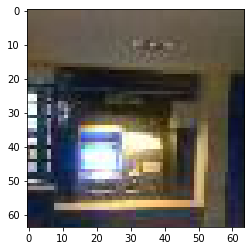

In [16]:
i = img_tensor[6]
img = trans(i)
plt.imshow(img)

In [13]:


probs = torch.nn.functional.softmax(out, dim=0)
top5_prob, top5_catid = torch.topk(probs, 5)

print(top5_prob.size())

torch.Size([100, 5])


In [14]:

for i in range(len(top5_prob)):
    print("################################",i)
    
    for j in range(0,5): 
        print(categories[top5_catid[i][j]], top5_prob[i][j].item())

################################ 0
bobsled 0.7852621078491211
chickadee 0.5946509838104248
power drill 0.5927613377571106
chain saw 0.3881184756755829
mousetrap 0.3051013648509979
################################ 1
sewing machine 0.808353841304779
dining table 0.5801253318786621
church 0.4262850284576416
yellow lady's slipper 0.30189868807792664
candle 0.2175791710615158
################################ 2
cliff dwelling 0.6898898482322693
stone wall 0.399699330329895
baboon 0.24113309383392334
bighorn 0.21059317886829376
cliff 0.18647336959838867
################################ 3
yawl 0.29775938391685486
tennis ball 0.278104692697525
lacewing 0.24906089901924133
hermit crab 0.19194342195987701
golf ball 0.15360870957374573
################################ 4
home theater 0.3207191228866577
mailbox 0.28048038482666016
shovel 0.2522970139980316
holster 0.1927289217710495
soap dispenser 0.19027458131313324
################################ 5
slug 0.43060025572776794
ptarmigan 0.40803381800